In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from keplergl import KeplerGl
import gzip
import numpy
import psycopg2
from minio import Minio
import sys
from keplergl import KeplerGl

In [10]:
a = ['refid']
for i in range(1, 673):
    a.append(str(i))
a

['refid',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '

In [11]:
als_flow_data = pd.read_csv('als_v_2022_02', names=a)
als_flow_data

,refid,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
0,0007c893fbce60b362af8d0370f2becd,77,83,88,80,99,93,95,89,78,...,96,90,84,83,88,90,89,90,100,86
1,00519b61ec06283d8da95acbfbca28b8,16,39,31,19,42,41,29,31,24,...,27,26,33,33,19,26,33,40,25,44
2,0053984f0083eb936556ff76b2a84d92,68,76,62,79,67,66,72,67,62,...,59,58,65,65,58,62,65,64,60,65
3,006f7599a5ab218213810ad7d318da17,55,60,57,60,60,62,57,60,59,...,58,59,50,69,68,61,63,59,73,70
4,000c4eb6ed389075d6dcb427ada19982,59,56,34,44,36,44,51,66,46,...,37,60,59,74,66,42,36,29,36,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414254,5f835a3e7c2b2c913d726e939b971beb,19,19,19,18,19,20,19,20,20,...,19,19,19,19,19,19,19,19,19,19
1414255,5f74c2ee1cd37fc7214fe98ea047c716,7,7,7,7,7,7,7,8,8,...,9,9,8,8,8,8,7,8,7,7
1414256,5f8b8f78610ede1fc5a86e1ed740c624,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
1414257,5f6da5f6c46bf6cfbbe0f426d0d2bb78,1,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,1,2,1,1


In [3]:
saeedi = als_flow_data[als_flow_data[0] == '2523fbab27fa43749bae99205934cb57']
enghelab = als_flow_data[als_flow_data[0] == '0c1bbd4b839beb1f51b6a959a84df601']
mirdamad = als_flow_data[als_flow_data[0] == 'ddb8522c5b3051c318ed5b0385dbe325']

In [4]:
saeedi = saeedi.iloc[0, 1:481]
enghelab = enghelab.iloc[0, 1:481]
mirdamad = mirdamad.iloc[0, 1:481]

In [5]:
time_bucket =  [i for i in range(1, 481)]

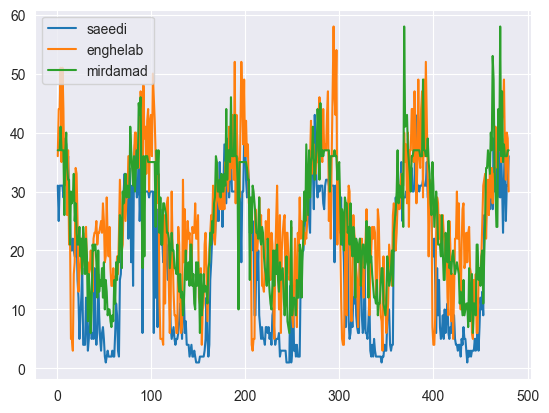

In [15]:
plt.plot(time_bucket, saeedi.values.tolist(), label='saeedi')
plt.plot(time_bucket, enghelab.values.tolist(), label='enghelab')
plt.plot(time_bucket, mirdamad.values.tolist(), label='mirdamad')
plt.legend()
plt.savefig(fname='time-series', dpi=350)

In [8]:
# warehouse-primary.smapp-traffic.svc
PARAMS_DIC = {
    "host"      : "127.0.0.1",
    "database"  : "static_features",
    "user"      : "admin",
    "password"  : "4ReL8aj[<|{6:uLI>JO<-^Mm"
}

In [9]:
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1)
    print("Connection successful")
    return conn

In [10]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1

    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()

    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [11]:
BOUNDING_BOX = [ 51.27297878265381,35.65060102359122, 51.58673286437988,35.74881103992283]

In [12]:
conn = connect(PARAMS_DIC)

Connecting to the PostgreSQL database...
could not translate host name "warehouse-primary.smapp-traffic.svc" to address: nodename nor servname provided, or not known



AssertionError: 

In [ ]:
# Connect to the database
# conn = connect(PARAMS_DIC)
column_name = ["refid", "geometry", "ref_length", "max_speed","road_class"]

# query = '''
#     select refid, ST_AsGeoJSON(wkb_geometry), cluster_label, ref_length
#     from sharedstreets_osm
#     where refid not in {} and wkb_geometry @ ST_MakeEnvelope({});
#         '''.format(ref_final,str(BOUNDING_BOX)[1:len(str(BOUNDING_BOX))-1]);

query = '''
    select refid, ST_AsGeoJSON(wkb_geometry), ref_length, max_speed, road_class
    from sharedstreets_osm_staging
    where wkb_geometry @ ST_MakeEnvelope({});
        '''.format(str(BOUNDING_BOX)[1:len(str(BOUNDING_BOX))-1]);


ss_df = postgresql_to_dataframe(conn, query, column_name)

In [12]:
ss_df = pd.read_csv('ss_df.csv')

In [13]:
ss_df

,Unnamed: 0,refid,geometry,ref_length,max_speed,road_class
0,0,83a9d56fff78a799fe34f558774578d1,"{""type"":""LineString"",""coordinates"":[[51.419598...",55,50.0,Tertiary
1,1,26eaa3d2f10b272650bc4b0b65c087c8,"{""type"":""LineString"",""coordinates"":[[51.453613...",48,30.0,Residential
2,2,e595c6beb43aac6e489f31b80c491d27,"{""type"":""LineString"",""coordinates"":[[51.468591...",16,50.0,Residential
3,3,5cdb151967e97132b38bd2b54eab9423,"{""type"":""LineString"",""coordinates"":[[51.445907...",130,30.0,Residential
4,4,c378f09f31978f997b239d67fda59a9a,"{""type"":""LineString"",""coordinates"":[[51.452917...",40,40.0,Tertiary
...,...,...,...,...,...,...
125543,125543,89bb8e946dd169d9da618f5f9367875f,"{""type"":""LineString"",""coordinates"":[[51.538062...",54,70.0,Primary
125544,125544,59f5e64c232b77e35f20c1f4c70bb1eb,"{""type"":""LineString"",""coordinates"":[[51.586249...",35,80.0,Trunk
125545,125545,15cb793a328a0b4ef65f1e7e9faa1ad4,"{""type"":""LineString"",""coordinates"":[[51.58125,...",113,50.0,Trunk
125546,125546,46f97efc150286d7ecbcfbbf46469753,"{""type"":""LineString"",""coordinates"":[[51.582551...",317,80.0,Trunk


In [14]:
y = pd.merge(ss_df, als_flow_data, on='refid')
y

,Unnamed: 0,refid,geometry,ref_length,max_speed,road_class,1,2,3,4,...,663,664,665,666,667,668,669,670,671,672
0,0,83a9d56fff78a799fe34f558774578d1,"{""type"":""LineString"",""coordinates"":[[51.419598...",55,50.0,Tertiary,38,41,42,42,...,36,25,42,49,69,17,67,91,43,38
1,1,26eaa3d2f10b272650bc4b0b65c087c8,"{""type"":""LineString"",""coordinates"":[[51.453613...",48,30.0,Residential,26,26,26,26,...,28,32,40,25,26,26,32,26,26,23
2,2,e595c6beb43aac6e489f31b80c491d27,"{""type"":""LineString"",""coordinates"":[[51.468591...",16,50.0,Residential,23,23,23,23,...,41,27,23,29,27,23,20,19,23,32
3,3,5cdb151967e97132b38bd2b54eab9423,"{""type"":""LineString"",""coordinates"":[[51.445907...",130,30.0,Residential,22,22,22,22,...,22,22,22,22,22,22,22,22,22,28
4,4,c378f09f31978f997b239d67fda59a9a,"{""type"":""LineString"",""coordinates"":[[51.452917...",40,40.0,Tertiary,19,19,19,37,...,20,15,20,20,20,6,19,19,19,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89635,125546,46f97efc150286d7ecbcfbbf46469753,"{""type"":""LineString"",""coordinates"":[[51.582551...",317,80.0,Trunk,81,83,81,88,...,98,81,78,90,79,88,80,88,74,76
89636,125547,5e35be8cc550681cb6a3ece476b4c665,"{""type"":""LineString"",""coordinates"":[[51.582751...",112,80.0,Primary,73,72,73,73,...,73,75,67,74,75,69,74,74,70,74
89637,125547,5e35be8cc550681cb6a3ece476b4c665,"{""type"":""LineString"",""coordinates"":[[51.582751...",112,80.0,Primary,73,72,73,73,...,73,75,67,74,75,69,74,74,70,74
89638,125547,5e35be8cc550681cb6a3ece476b4c665,"{""type"":""LineString"",""coordinates"":[[51.582751...",112,80.0,Primary,73,72,73,73,...,73,75,67,74,75,69,74,74,70,74


In [15]:
x = y[['refid', 'geometry', '258']]

In [16]:
map_1 = KeplerGl(data={'data': x})
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data':                                   refid  \
0      83a9d56fff78a799fe34f558774578d1   
1…

In [17]:
x.to_csv('x.csv')

In [38]:
map_1

KeplerGl(data={'data':                                   refid  \
0      83a9d56fff78a799fe34f558774578d1   
1…

In [2]:
map_2 = KeplerGl()
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [7]:
map_3 = KeplerGl(data={'data': ss_df})
map_3

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data':         Unnamed: 0                             refid  \
0                0  83a9d56fff7…